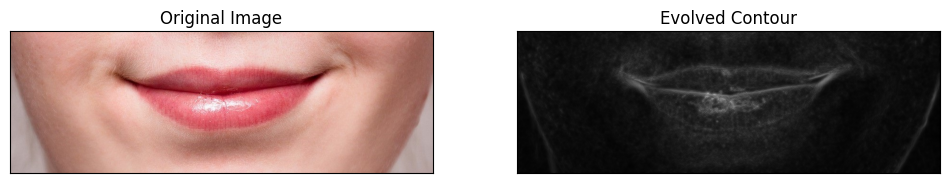

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to calculate external energy (gradient magnitude)
def calculate_external_energy(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 1, cv2.NORM_MINMAX)
    return magnitude

# Function to evolve the contour
def evolve_contour(contour, alpha=0.01, beta=0.1, gamma=0.1, iterations=100):
    for _ in range(iterations):
        gradient = calculate_external_energy(image)
        fx = cv2.Sobel(contour, cv2.CV_64F, 1, 0, ksize=3)
        fy = cv2.Sobel(contour, cv2.CV_64F, 0, 1, ksize=3)
        fxx = cv2.Sobel(fx, cv2.CV_64F, 1, 0, ksize=3)
        fyy = cv2.Sobel(fy, cv2.CV_64F, 0, 1, ksize=3)
        curvature = fxx + fyy
        alpha_term = alpha * curvature
        beta_term = beta * gradient
        total_energy = alpha_term + beta_term
        contour += gamma * total_energy
        contour = np.clip(contour, 0, 1)
    return contour

# Load the image
image = cv2.imread(r".\images\lip.jpg")
image = np.float32(image) / 255.0

# Get the dimensions of the image
rows, cols, _ = image.shape

# Initialize the contour (starting with a circle in the center)
contour = np.zeros((rows, cols))
center = (rows // 2, cols // 2)
radius = min(rows, cols) // 4
cv2.circle(contour, center, radius, 1, -1)

# Evolve the contour
evolved_contour = evolve_contour(contour)

# Display the original image and the evolved contour
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(evolved_contour, cmap='gray')
plt.title("Evolved Contour"), plt.xticks([]), plt.yticks([])

plt.show()